In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data=pd.read_csv('C:\\Users\\admin\\Downloads\\Data Analysis Challenge Data Set.csv')

In [3]:
raw_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
print('The dataset is a cross sectional data with ',raw_data.shape[0],'rows and ',raw_data.shape[1],'columns.')
print('Columns are: \n',list(raw_data.columns))

The dataset is a cross sectional data with  205 rows and  26 columns.
Columns are: 
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


**Count of null entries:**

In [5]:
Variable_with_null_variables=[]
for i in raw_data.isnull().sum():
    if i>0:
        Variable_with_null_variables.append(i)
Variable_with_null_variables

[]

**Initial Numrical Data Description:**

In [6]:
raw_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


**Initial Categorical Data Description:**

In [7]:
raw_data.describe(include='all').loc['count':'freq',].T.dropna()

,count,unique,top,freq
normalized-losses,205,52,?,41
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159


Entry '?' seems to be an error, needs further check.

**Initial Data Format Check:**

In [8]:
Variable_type=pd.DataFrame(columns=['Variable','Type'])
for i in raw_data.columns:
    dummy_list=[]
    for j in raw_data[i]:
        dummy_list.append(type(j))
    naa=str(set(dummy_list)).split("'")[1]
    Variable_type=Variable_type.append({'Variable':i,'Type':naa},ignore_index=True)
Variable_type

,Variable,Type
0,symboling,int
1,normalized-losses,str
2,make,str
3,fuel-type,str
4,aspiration,str
5,num-of-doors,str
6,body-style,str
7,drive-wheels,str
8,engine-location,str
9,wheel-base,float


formats of few variables are wrong. Further check is needed.

In [9]:
##Check for variables which contains '?'.

(raw_data=='?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# Data Cleaning

In [10]:
##Dropping variable 'normalized-losses' as it containg 41/205 entries as '?'.
raw_data_NL_removed=raw_data.drop('normalized-losses',axis=1)
raw_data_NL_removed.shape

(205, 25)

In [11]:
##Checking remaining variables.

(raw_data_NL_removed=='?').sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [12]:
##Removing all entries which contains '?'. Since all remaining '?' are in numerical variables. We have no option but to to remove entries.

cleaned_data=raw_data_NL_removed[raw_data_NL_removed != '?'].dropna()

In [13]:
##Count of entries in remaining variables.
cleaned_data.describe(include='all').T['count']

symboling            193
make                 193
fuel-type            193
aspiration           193
num-of-doors         193
body-style           193
drive-wheels         193
engine-location      193
wheel-base           193
length               193
width                193
height               193
curb-weight          193
engine-type          193
num-of-cylinders     193
engine-size          193
fuel-system          193
bore                 193
stroke               193
compression-ratio    193
horsepower           193
peak-rpm             193
city-mpg             193
highway-mpg          193
price                193
Name: count, dtype: object

In [14]:
##Correcting variable format ( String to float)

cleaned_data[['bore', 'stroke','horsepower', 'peak-rpm','price']]=cleaned_data[['bore', 'stroke','horsepower', 'peak-rpm','price']].astype(float)

In [15]:
cleaned_data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [16]:
##Converting 'symboling' into a string type object. It will help us analyze categorical data easily.
cleaned_data['symboling']=cleaned_data['symboling'].astype(str)

In [17]:
##Comparison by variable type

Variable_type_corrected=pd.DataFrame(columns=['Variable','Type'])
for i in cleaned_data.columns:
    dummy_list_2=[]
    for j in cleaned_data[i]:
        dummy_list_2.append(type(j))
    naa=str(set(dummy_list_2)).split("'")[1]
    Variable_type_corrected=Variable_type_corrected.append({'Variable':i,'Type':naa},ignore_index=True)
variable_type_comaprison=Variable_type
variable_type_comaprison=variable_type_comaprison.merge(Variable_type_corrected,on='Variable',how='left',suffixes=('_raw', '_cleaned'))
variable_type_comaprison.iloc[1,2]='variable_dropped'
variable_type_comaprison

,Variable,Type_raw,Type_cleaned
0,symboling,int,str
1,normalized-losses,str,variable_dropped
2,make,str,str
3,fuel-type,str,str
4,aspiration,str,str
5,num-of-doors,str,str
6,body-style,str,str
7,drive-wheels,str,str
8,engine-location,str,str
9,wheel-base,float,float


In [18]:
## Checking variable details of Categorical Variables:

categorical_variables=list(cleaned_data.describe(include='all').loc['count':'freq',].T.dropna().T.columns)
quantitave_variables=list(cleaned_data.describe().columns)
for i in categorical_variables:
    print(i,list(set(cleaned_data[i])))

symboling ['-2', '2', '-1', '0', '3', '1']
make ['audi', 'volkswagen', 'bmw', 'toyota', 'mazda', 'mercury', 'mitsubishi', 'chevrolet', 'nissan', 'isuzu', 'subaru', 'alfa-romero', 'jaguar', 'porsche', 'volvo', 'plymouth', 'mercedes-benz', 'peugot', 'dodge', 'honda', 'saab']
fuel-type ['gas', 'diesel']
aspiration ['turbo', 'std']
num-of-doors ['four', 'two']
body-style ['wagon', 'hardtop', 'convertible', 'hatchback', 'sedan']
drive-wheels ['rwd', 'fwd', '4wd']
engine-location ['front', 'rear']
engine-type ['dohc', 'ohc', 'ohcv', 'l', 'ohcf']
num-of-cylinders ['three', 'four', 'six', 'five', 'eight', 'twelve']
fuel-system ['idi', 'mpfi', 'spdi', '2bbl', 'spfi', 'mfi', '1bbl']


**No error or wrong entry detected (spelling error etc)** 

# Data Analysis
**We will be performing analysis on the cleaned dataset.**

In [19]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
wheel-base,193.0,98.923834,6.152409,86.60,94.50,97.00,102.40,120.90
length,193.0,174.326425,12.478593,141.10,166.30,173.20,184.60,208.10
width,193.0,65.893782,2.137795,60.30,64.10,65.40,66.90,72.00
height,193.0,53.869948,2.394770,47.80,52.00,54.10,55.70,59.80
curb-weight,193.0,2561.507772,526.700026,1488.00,2145.00,2414.00,2952.00,4066.00
engine-size,193.0,128.124352,41.590452,61.00,98.00,120.00,146.00,326.00
bore,193.0,3.330622,0.272385,2.54,3.15,3.31,3.59,3.94
stroke,193.0,3.248860,0.315421,2.07,3.11,3.29,3.41,4.17
compression-ratio,193.0,10.143627,3.977491,7.00,8.50,9.00,9.40,23.00
horsepower,193.0,103.481865,37.960107,48.00,70.00,95.00,116.00,262.00


**Data Summary Categorical Variables:**

In [20]:
cleaned_data.describe(include='all').loc['count':'freq',].T.dropna()

,count,unique,top,freq
symboling,193,6,0,63
make,193,21,toyota,32
fuel-type,193,2,gas,174
aspiration,193,2,std,158
num-of-doors,193,2,four,112
body-style,193,5,sedan,92
drive-wheels,193,3,fwd,114
engine-location,193,2,front,190
engine-type,193,5,ohc,141
num-of-cylinders,193,6,four,153


Top occurrences and frequency are shown above.

Gas fueled vehicle are vastly available (90%). Diesel type are hardly there(10%).

Most vehicle have aspiration='std'.(81.86%), while only 18.14% are 'turbo'.

Almost all vehicles have engine in front (98.44%).

Engine type 'ehc' is vastly available (73%). Breakup of rest needs analysis.

Vehicle with 4 cylinders is vastly available (73%). Breakup of rest needs analysis.

Rest categories needs further analysis.

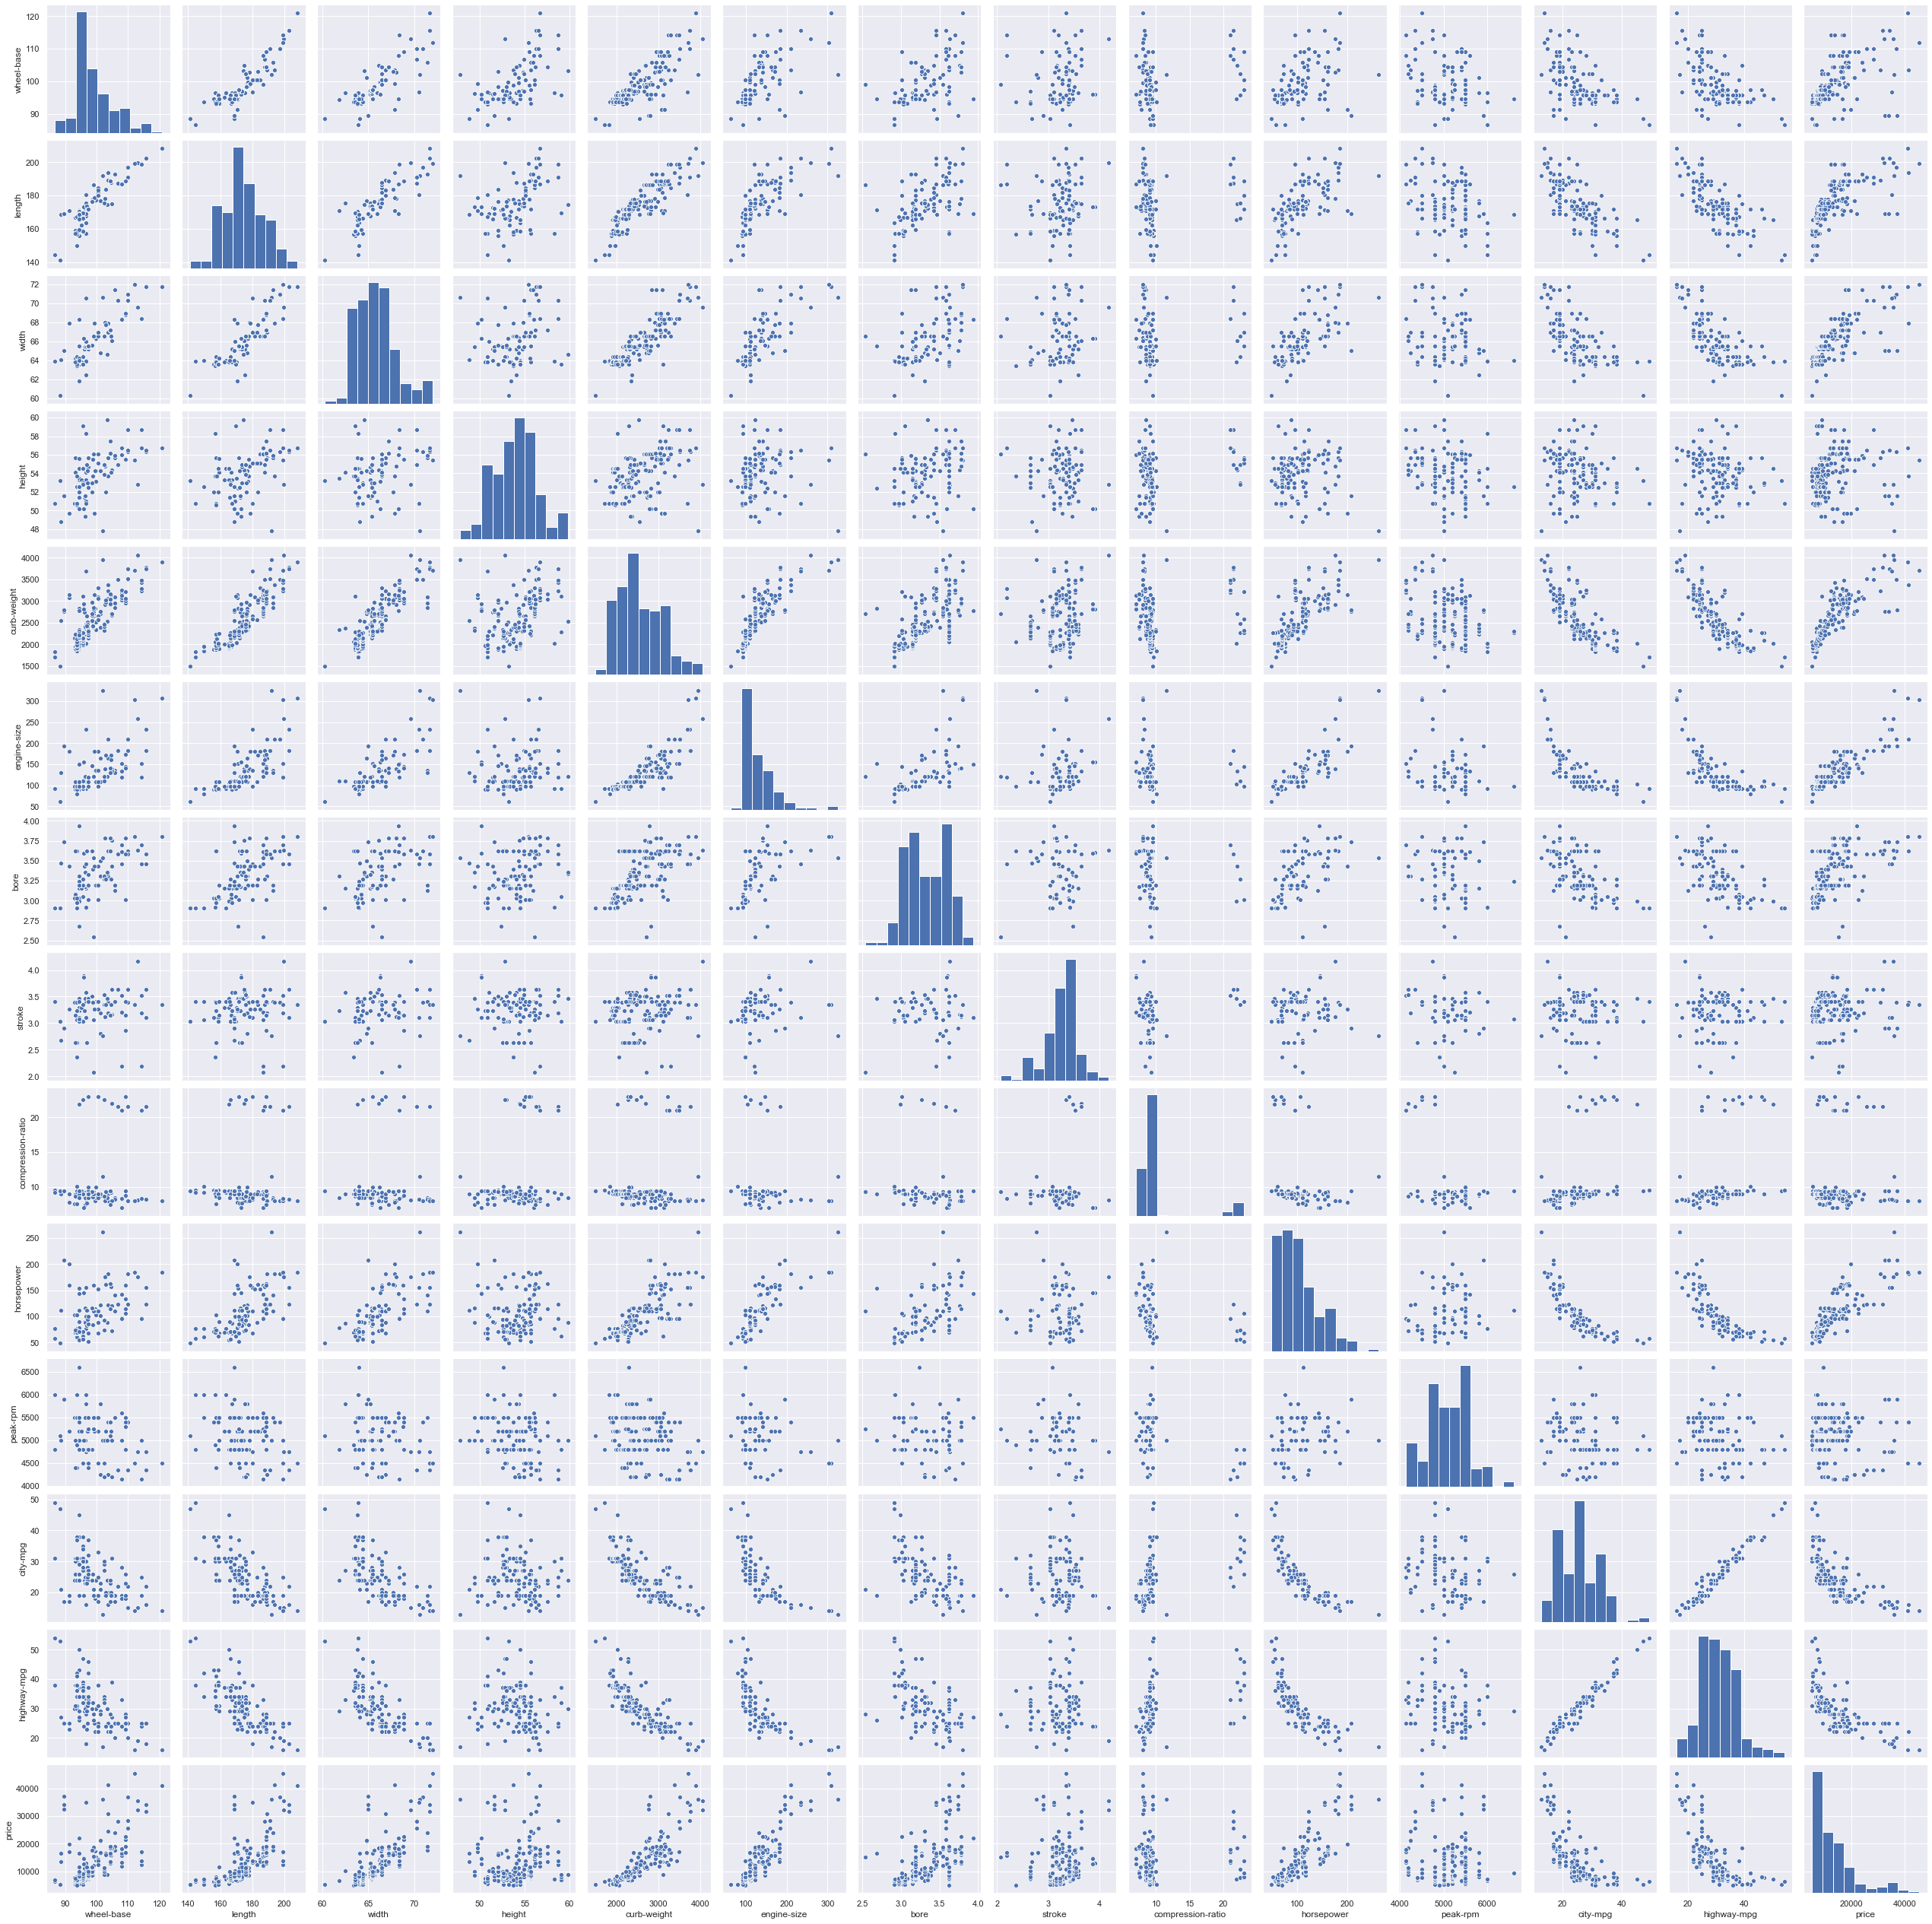

In [21]:
sns.pairplot(cleaned_data[quantitave_variables])

There seems to be a positive linear relationship between 'city-mpg' and 'highway-mpg'.

Most vehicle have compression ratio less than 10.
'Wheelbase' seems to have linear positive relationship with 'length','wheelbase','curb-weight','width'.

'Wheelbase' seems to have linear positive relationship with 'length' and 'width'.
'Wheelbase' seems to have negative relationship with 'city-mpg' and 'highway-mpg'.

'Price' seems to have negative relationship with 'city-mpg' and 'highway-mpg'.


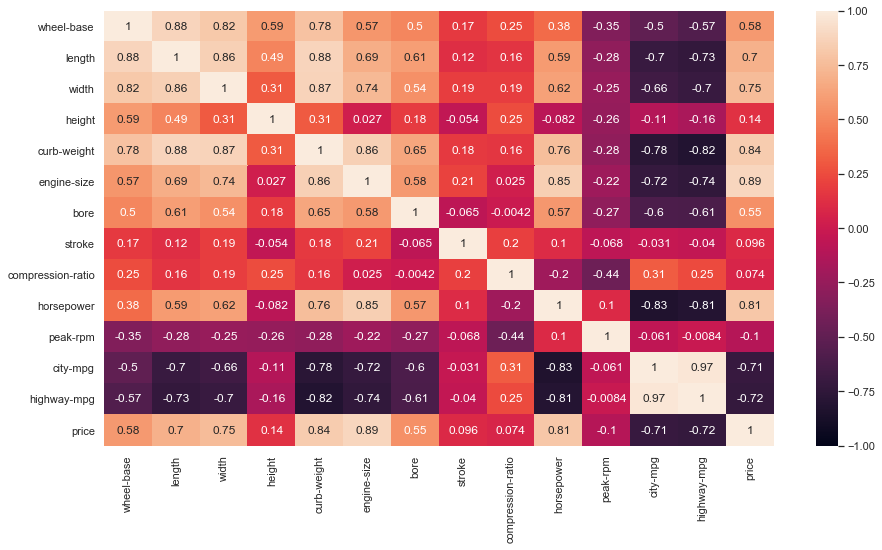

In [22]:
#lets plot heatmap for better understanding
plt.figure(figsize=(15,8))
sns.heatmap(cleaned_data.corr(), annot = True, fmt='.2g',vmin=-1, vmax=1)

MPG-> The vehicle with more city-mpg will have more highway mpg and vice versa. Lets call it mpg together.

Incresing any one parameter among  length, width, curb-weight, engine-size, bore and horsepower will greatly reduce MPG.

Higher the wheelbase, lower the MPG.

Higher the compression ratio, higher the MPG.

Higher MPG vehicles are cheaper.

Price->

Incresing any one parameter among length, width, curb-weight, engine-size, and horsepower will increase price by significantly.

Higher the wheelbase, higher the Price.

Costly vehicle give very less MPG.

Others->

Increasing rpm reduces comression ratio and vice versa.

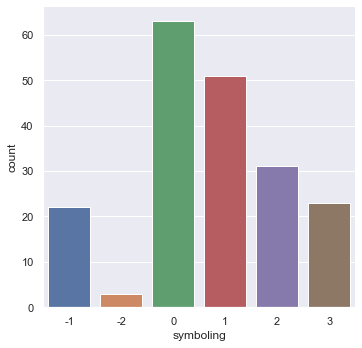

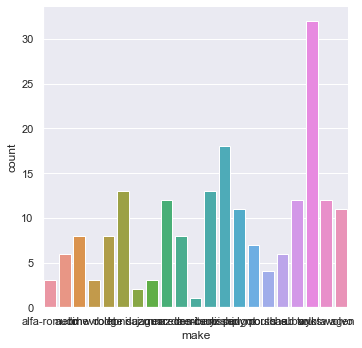

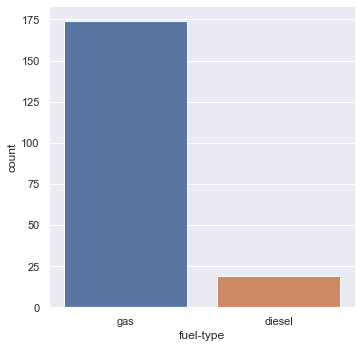

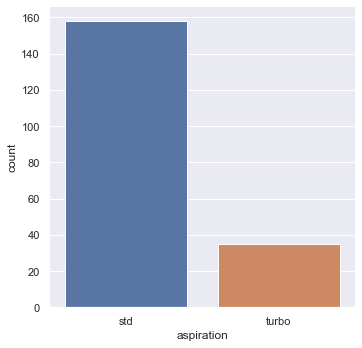

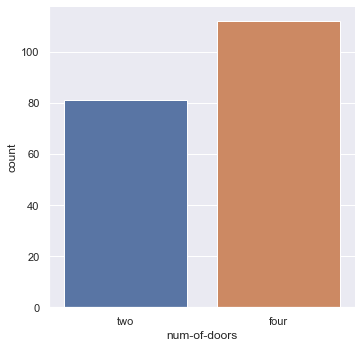

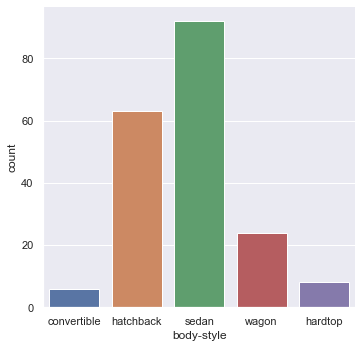

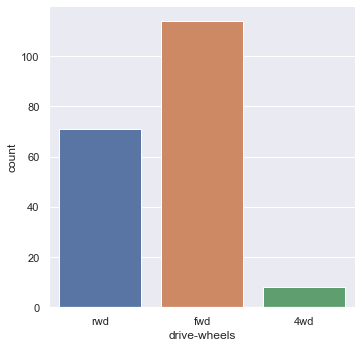

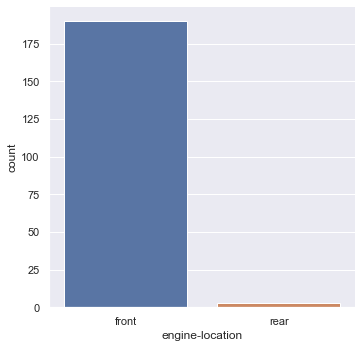

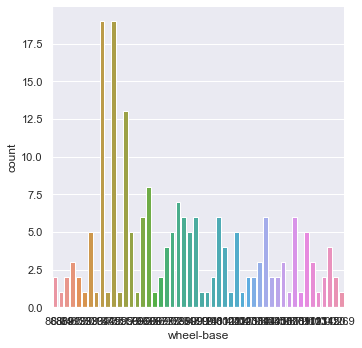

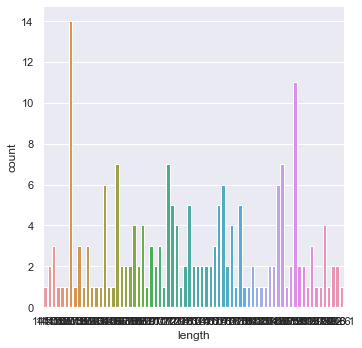

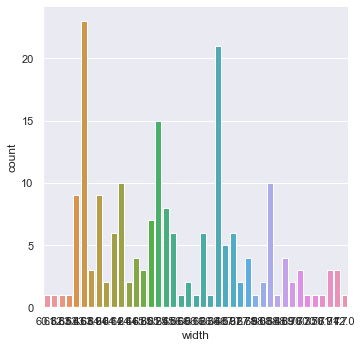

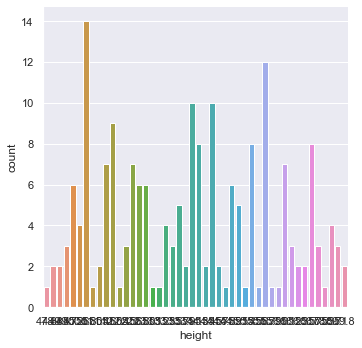

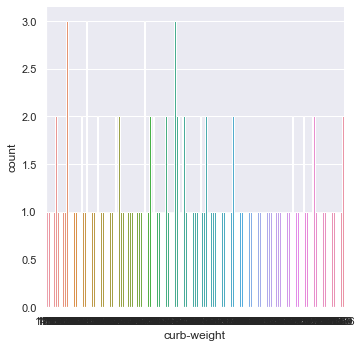

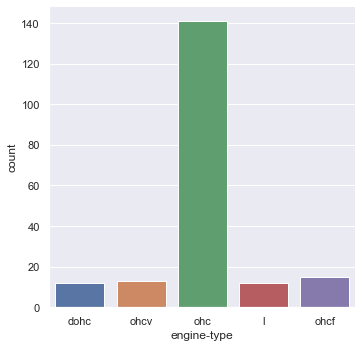

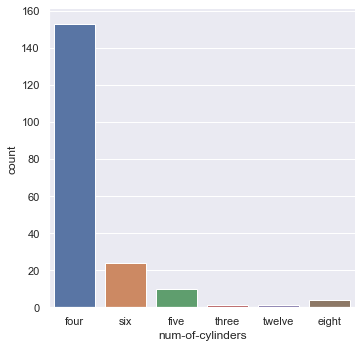

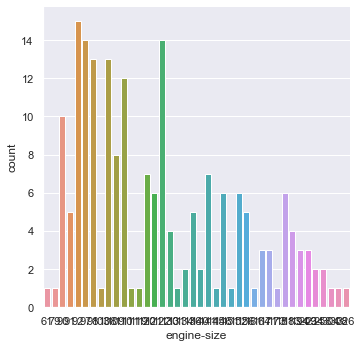

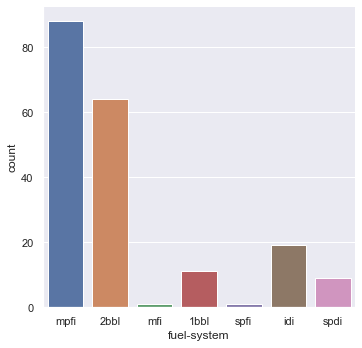

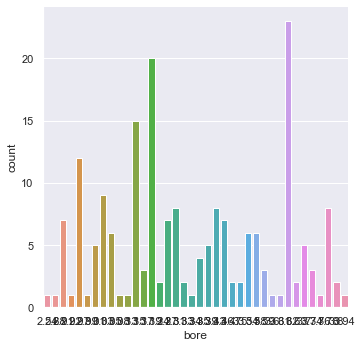

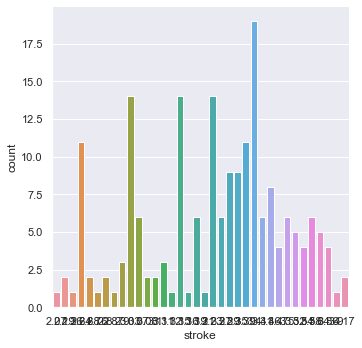

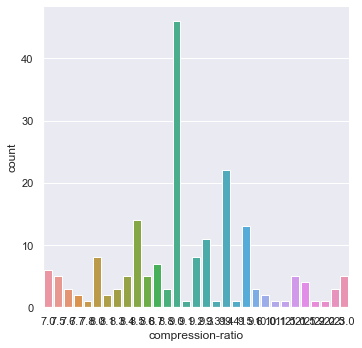

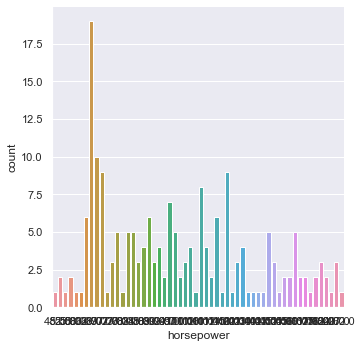

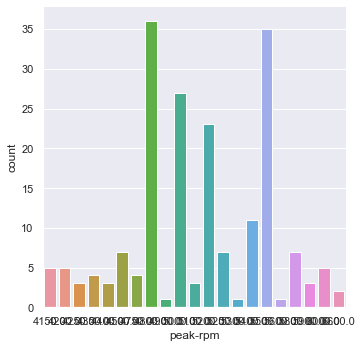

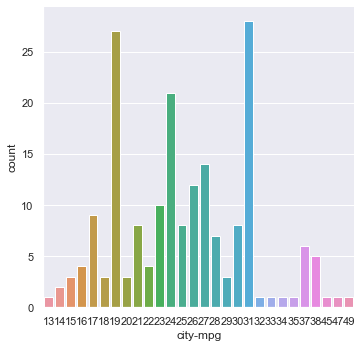

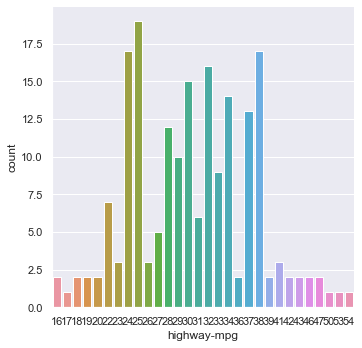

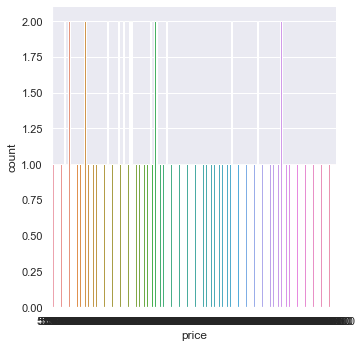

In [23]:
#Categorical data analysis-
for i in cleaned_data.columns:
    sns.catplot(x=i, kind="count", data=cleaned_data)
    
# We will only analyse the categorical distribution

Most vehicle are of symbol = 0 followed by symbol = 1, While the safest vehicle with symbol=-2 are least.
> We can say that safety in most of the vehicle is average.
Vehicle with gas type fuel is prevalent. 

Aspiration type std is prevalent.

Almost all vehicles have an engine in front.

Ohc engine types are prevalent while rest categories are nearly equal.

Four-cylinder Vehicles are prominent. while 12 & 3 cylinder vehicles are barely there.

Most vehicles are fwd wheels driven followed by bwd. 4wd wheels driven vehicle are rarely available.

Mpfi vehicle is mostly available with 2bbl following suit. Rest lacks behind by a lot with mfi & spfi almost nonexistent.

The most common maker is Toyota with Nissan in the second position. Mercury vehicles are hardly there.

Four-door vehicles are more than two-door vehicles.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

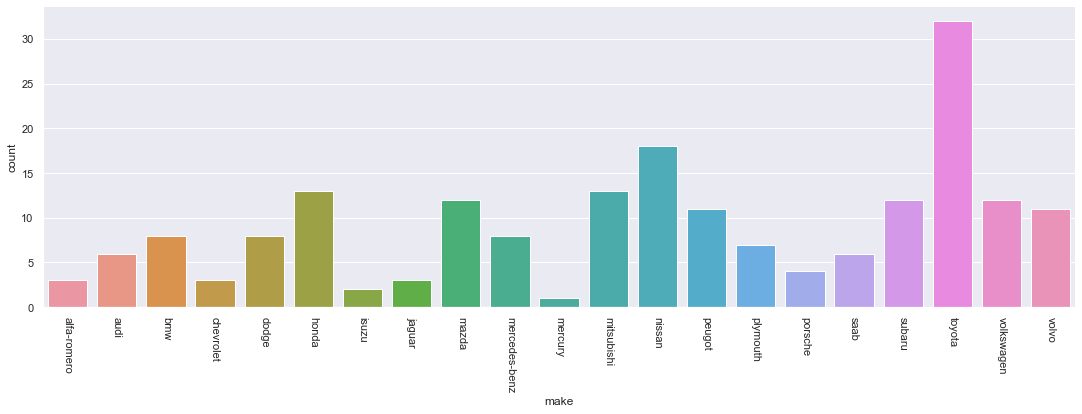

In [24]:
sns.catplot(x='make', kind="count",height=5, aspect=3, data=cleaned_data)
plt.xticks(rotation=-90)

Most common maker is toyota with nissan at second position. Mercury vehicle are hardly there.

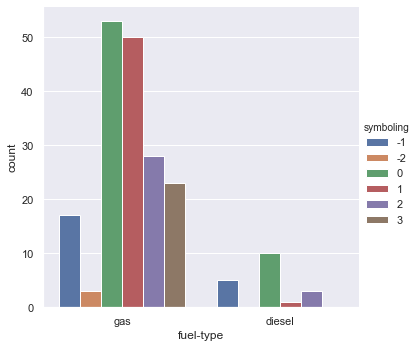

In [25]:
sns.catplot(x='fuel-type',hue='symboling',data=cleaned_data, kind='count')

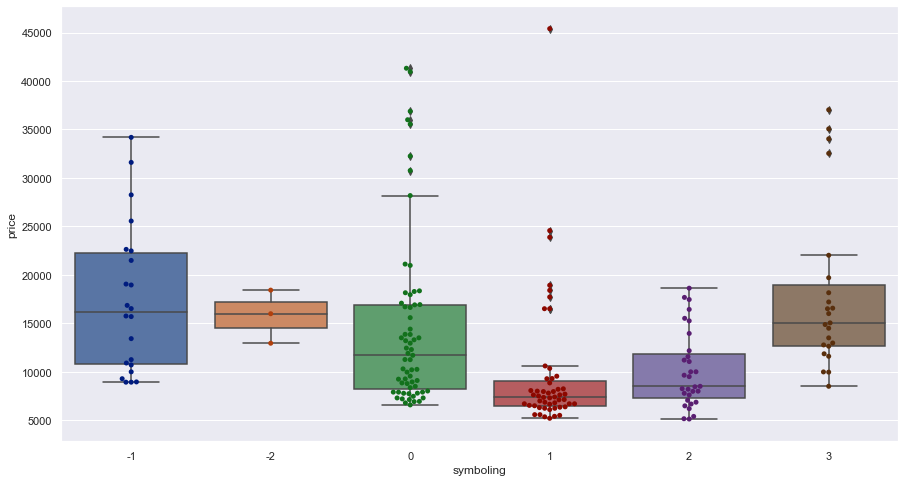

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='symboling',y='price',data=cleaned_data)
sns.swarmplot(x="symboling", y="price", data=cleaned_data,palette='dark')

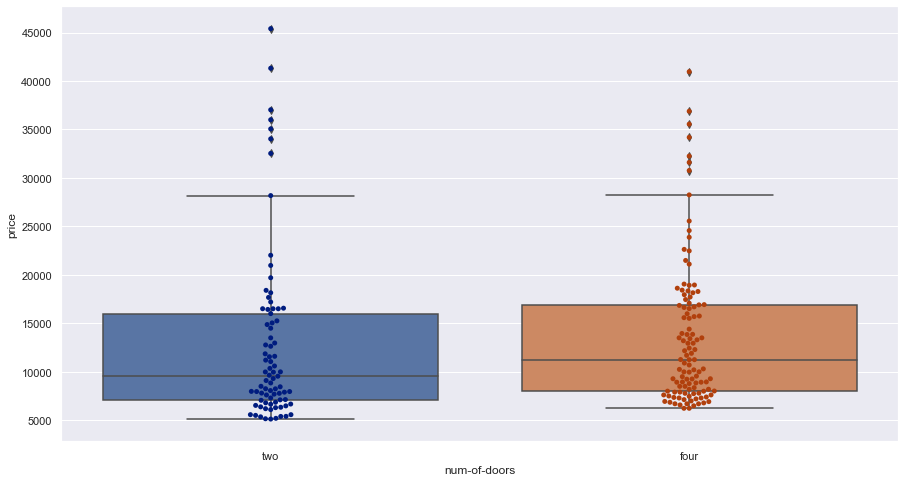

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x='num-of-doors',y='price',data=cleaned_data)
sns.swarmplot(x='num-of-doors', y="price", data=cleaned_data,palette='dark')

Does not affect price much. Excluding from final file.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

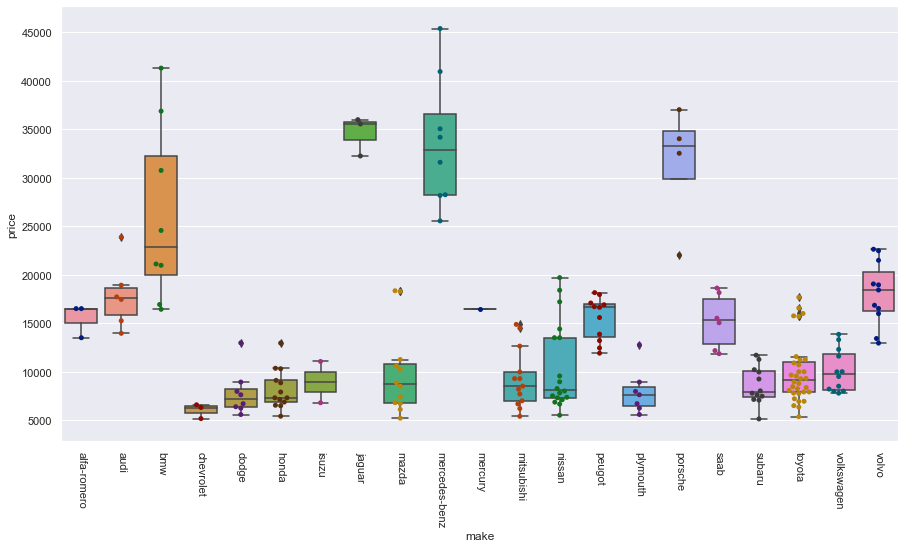

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x='make',y='price',data=cleaned_data)
sns.swarmplot(x="make", y="price", data=cleaned_data,palette='dark')
plt.xticks(rotation=-90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

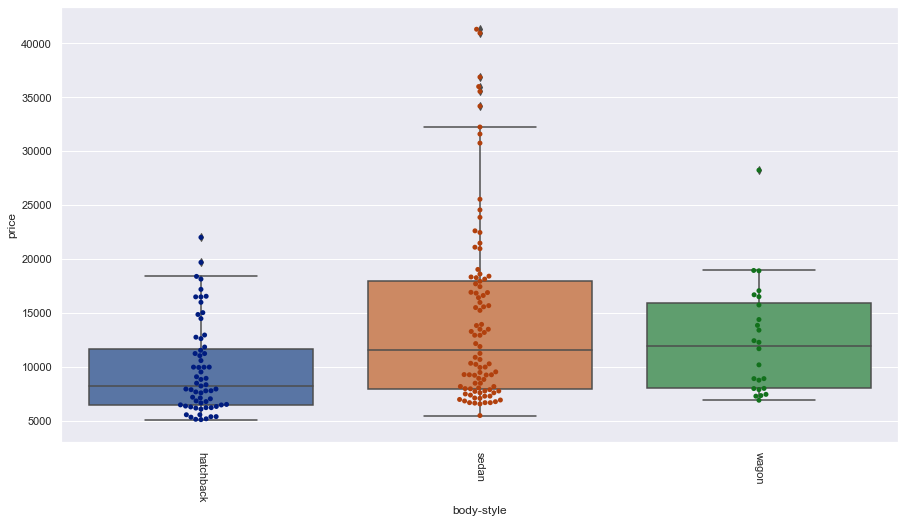

In [29]:
#for bodytype we will not be considering convertible and hardtop as the observations are too less to make a conclusion.If included might result in biased conclusion.

Major_body_cleaned_data=cleaned_data[cleaned_data != 'convertible']
Major_body_cleaned_data=Major_body_cleaned_data[Major_body_cleaned_data != 'hardtop']
plt.figure(figsize=(15,8))
sns.boxplot(x='body-style',y='price',data=Major_body_cleaned_data)
sns.swarmplot(x="body-style", y="price", data=Major_body_cleaned_data,palette='dark')
plt.xticks(rotation=-90)

Sedan has higher range of price. In all categories majority of vehichles are in lower price segment with similar price, less models are available as we increase price.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

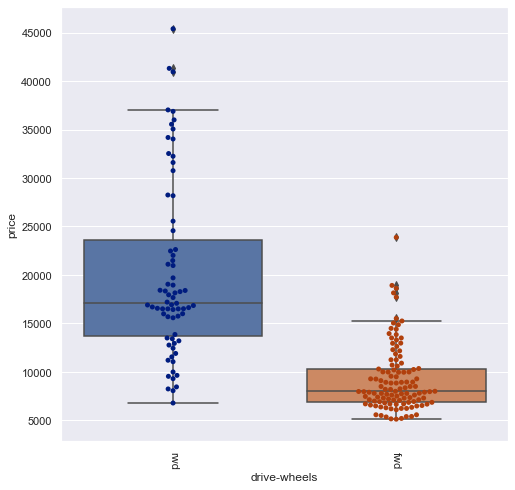

In [30]:
#for drive-wheels we will not be considering '4wd' as the observations are too less to make a conclusion.If included might result in biased conclusion.

DV_cleaned_data=cleaned_data[cleaned_data != '4wd']
plt.figure(figsize=(8,8))
sns.boxplot(x='drive-wheels',y='price',data=DV_cleaned_data)
sns.swarmplot(x='drive-wheels', y="price", data=DV_cleaned_data,palette='dark')
plt.xticks(rotation=-90)

Fwd vehicles drive wheels costs less and have lower price range while rws drive wheels vehicles costs more and have higher price range.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

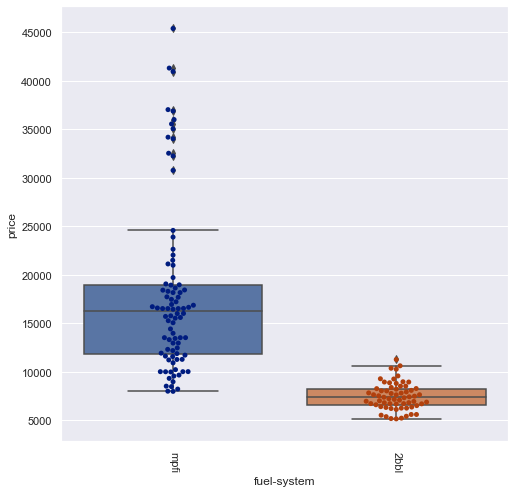

In [31]:
#for fuel-system we will not be considering 'mfi', '1bbl', 'spfi', 'idi', 'spdi' as the observations are too less to make a conclusion. If included might result in biased conclusion.

FS_cleaned_data=cleaned_data
for k in [ 'mfi', '1bbl', 'spfi', 'idi', 'spdi']:
    FS_cleaned_data=FS_cleaned_data[FS_cleaned_data['fuel-system']!=k]
plt.figure(figsize=(8,8))
sns.boxplot(x='fuel-system',y='price',data=FS_cleaned_data)
sns.swarmplot(x='fuel-system', y="price", data=FS_cleaned_data,palette='dark')
plt.xticks(rotation=-90)

'mpfi' vehicles have a higher price and have a wide range of price while 2bbl is cheap and saturated around 7500